In [26]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from helpers import *
from implementations import *

# from test_utils import test

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Run de A a Z

### Loading  data 

In [2]:
x_train, x_test, y_train, train_ids, test_ids = load_csv_data("dataset")


### Extract labels 

In [3]:
labels = np.genfromtxt("dataset/x_test.csv", delimiter=",", dtype = str, max_rows=1)
labels = np.delete(labels,0) # delete the label 'id' as we dont have it in x_train and x_test

### Cleaning and feature selection

Due to the high number of features with all different exceptions values and linearity, we decided to select manually the features we found relevant. The list below is the name of the feature, the exception values that we have to remplace, and wheter we remplace by majority (True) or by the mean (False)

In [4]:
label_list = [("MSCODE", [], True),
            ("_HCVU651", [9], True),
            ("_RFHYPE5", [9], True),
            ("_RFCHOL", [9], True),
            ("_RACE",[9], True),
            ("_BMI5",[], False),
            ("_EDUCAG",[9], True),
            ("_INCOMG",[9], True),
            ("_DRNKWEK",[99900], False),
            ("_SMOKER3",[9], True),
            ("_FRUTSUM",[], False),
            ("_VEGESUM",[], False),
            ("PA1MIN_",[], False),
            ("GENHLTH",[7,9], False),
            ("CHECKUP1",[7,9], False),
            ("MENTHLTH",[88, 77, 99], False),
            ("BPHIGH4",[7,9], True),
            ("BPMEDS",[7,9], True),
            ("TOLDHI2",[7,9], True),
            ("CHCOCNCR",[7,8,9], True),
            ("DIABETE3",[7,8,9], True),
            ("SEX",[], True),
            ("QLACTLM2",[7,9], True),
            ("AVEDRNK2",[77, 99], False),
            ("EXERANY2",[7,9], True),
            ("SHINGLE2", [7,9], True),
            ("LMTJOIN3", [7,9], True),
            ("CVDASPRN", [7,9], True)
            ]

#jai retirer #("_DRNKWEK",[99900], True),


# label_list = [
#             ("_RFCHOL", [9], True),
#             ("_SMOKER3",[9], True),
#             ("_DRNKWEK",[99900], False),
#             ("LMTJOIN3", [7,9], True)
#             ]

cleaned_x_train = clean_data(labels, label_list, x_train)

In [58]:
cleaned_x_train

array([[ 1.        ,  1.        , -0.67754031,  2.        ],
       [ 1.        ,  1.        , -0.67754031,  2.        ],
       [ 2.        ,  3.        , -0.55759541,  2.        ],
       ...,
       [ 2.        ,  4.        , -0.67754031,  2.        ],
       [ 1.        ,  4.        , -0.67754031,  2.        ],
       [ 1.        ,  4.        , -0.67754031,  2.        ]])

We then check that we have enough data in our features, i.e. there is not an exagerated amount of nans

In [8]:
# want to see which labels are way to small

for label in label_list:
    l, _, _ = label
    id = np.where(labels == l)[0][0]
    x = x_train[:][id]

    # Count the number of NaN values
    nans= np.count_nonzero(np.isnan(x))
    nan_perc = nans/len(x) *100
    print(nan_perc)

46.728971962616825
46.728971962616825
42.05607476635514
32.398753894081
38.940809968847354
41.43302180685358
44.54828660436137
41.74454828660436
44.85981308411215
41.74454828660436
50.155763239875384
42.99065420560748
46.10591900311526
42.679127725856695
36.7601246105919
38.006230529595015
43.925233644859816
42.05607476635514
50.77881619937694
38.31775700934579
39.56386292834891
45.17133956386293
30.8411214953271
42.679127725856695
42.36760124610592
47.35202492211838
52.024922118380054
47.66355140186916


We check that our features are uncorrelated as it would lead to less good results, but we saw that the uncorrelated data had the same dimension as the original cleaned data, so no changes were made.

In [6]:
correlation_matrix = np.corrcoef(cleaned_x_train, rowvar=False)
correlation_threshold = 0.7
uncorrelated_indices = np.where(np.abs(correlation_matrix) < correlation_threshold)
uncorrelated_columns = np.unique(uncorrelated_indices[1])
uncorrelated_data = cleaned_x_train[:, uncorrelated_columns]
print(uncorrelated_data.shape)
cleaned_x_train.shape

(328135, 28)


(328135, 28)

## Training
We here choose which function we want to train our data with

#### Ridge regression

In [28]:
lambda_ = 0.0001
degree = 25
## tx is cleaned data 
poly = build_poly(cleaned_x_train,degree)
w , loss = ridge_regression(y_train,poly,lambda_)

#### Mean squared errors gd

In [66]:
gamma = 0.00001
max_iters = 10
w_initial = np.zeros(cleaned_x_train.shape[1])

w, loss = mean_squared_error_gd(y_train, cleaned_x_train, w_initial, max_iters, gamma)

0.4993986956091768
[ 1.49149836  0.88424169  1.0928433   1.0681191   1.58292944 -0.02986482
  2.46525858  3.33774353 -0.28192911  2.7891989  -0.09306784  0.01482692
 -0.01443856 -0.14114484  0.03767431 -0.03618673  1.92945536  0.87786506
  1.39991229  1.5784889   2.32960102  1.31729361  1.49201084  0.00610009
  1.00319927  1.63260981  1.55146231  1.63790869]

0.49879843747016817
[ 1.49013674  0.88347635  1.09185108  1.06714858  1.58153353 -0.02985285
  2.46310775  3.33481885 -0.2816681   2.78675625 -0.09298484  0.01482112
 -0.0144288  -0.14111137  0.0376724  -0.03617254  1.92784717  0.87710155
  1.3987285   1.5771201   2.32760551  1.3161583   1.49073496  0.00610813
  1.00231259  1.63118609  1.55012586  1.63648116]

0.49819922376146286
[ 1.48877631  0.88271168  1.09085973  1.0661789   1.58013883 -0.02984088
  2.4609588   3.33189672 -0.28140732  2.78431573 -0.09290191  0.01481534
 -0.01441905 -0.14107794  0.03767048 -0.03615837  1.92624037  0.87633872
  1.39754575  1.57575248  2.32561173

In [13]:
loss

629861112644857.4

#### Mean squared error sgd

In [67]:
gamma = 0.00001
max_iters = 100
w_initial = np.zeros(cleaned_x_train.shape[1])

w, loss = mean_squared_error_sgd(y_train, cleaned_x_train, w_initial, max_iters, gamma)

#### Least squared error

In [15]:
w, loss = least_squares(y_train, cleaned_x_train)

#### logistic regression

In [9]:
max_iters = 1000
gamma = 0.01
w_initial = np.zeros(cleaned_x_train.shape[1])
w, loss = logistic_regression(y_train, cleaned_x_train, w_initial, max_iters, gamma)

/Users/Julie/Desktop/EPFL/MA3/ML/ML_project1/helpers.py:96: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1 + np.exp(-t))
/Users/Julie/Desktop/EPFL/MA3/ML/ML_project1/helpers.py:115: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y * np.log(pred) + (1 - y) * np.log(1 - pred))
/Users/Julie/opt/anaconda3/envs/project1-grading/lib/python3.9/site-packages/numpy/core/_methods.py:180: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


#### reg logistic

In [17]:
max_iters = 1000
gamma = 0.01
lambda_ = 0.001
w_initial = np.zeros(cleaned_x_train.shape[1])
w, loss = reg_logistic_regression(y_train, cleaned_x_train, lambda_, w_initial, max_iters, gamma)

In [11]:
print(w)
print(loss)
print(len(w))

[-14.94654844  -8.86041833 -10.95209755 -10.7041755  -15.86103559
   0.29862725 -24.70209289 -33.44406829   2.49547911 -27.94832886
   0.12885338  -0.13907889   0.27005057   1.41137584  -0.3767432
   0.36182774 -19.33160429  -8.79661849 -14.0267415  -15.81695467
 -23.34238012 -13.19953548 -14.94975626  -0.06101997 -10.05296346
 -16.35952997 -15.54578696 -16.41260577]
nan
28


### Testing

We then test our data, cleaning the test dataset and building predictions

In [12]:
#clean up x test

cleaned_x_test = clean_data(labels, label_list, x_test)


In [72]:
# only used for ridge
poly_test = build_poly(cleaned_x_test,degree)
poly_test.shape
                                 

(109379, 701)

#### Prediction

Use the correct prediction function depending on which train method

In [74]:
yp = predict_labels_mse(w,cleaned_x_test)

[-0.07667651 -0.07756121 -0.07517545 ... -0.06903538 -0.0704128
 -0.07593806]


In [ ]:
yp = predict_labels_logistic(w,cleaned_x_test)

In [21]:
print(len(np.where(y_pred == 1)[0]))

0


#### CSV Submission

In [24]:
create_csv_submission(test_ids,yp,"outputs/ridge_degre25_200features.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'outputs/ridge_degre25_200features.csv'

## Train test split for our own cross validation

####read me or smth

- N c'est le nombre de loops
- pour l'instant ca loop sur gamma mais si tu veux changer de param tu peux le modifier
- initial_w, accs et f1s pas besoin de changer

Utilise pas ridge i guess tfacon c'est pas celle qui nous interesse


In [23]:
x_train_1, y_train_1, x_test_1, y_test_1 = split_train_test(y_train, x_train, 0.7)
cleaned_x_train_1 = clean_data(labels, label_list, x_train_1)
cleaned_x_test_1 = clean_data(labels, label_list, x_test_1)

In [27]:
N = 10
max_iters = 100
gammas = np.linspace(0.0001, 0.1, N)
initial_w = np.zeros(cleaned_x_train_1.shape[1])
accs = []
f1s = []

for gamma in gammas:
    # train
    # choisi la methode de train qui t'interesse
    w, loss = mean_squared_error_gd(y_train_1, cleaned_x_train_1, initial_w, max_iters, gamma)

    #predict 
    # choisi la methode de test qui t'interresse (commente l'autre)
    yp = predict_labels_mse(w,cleaned_x_test_1)
    #yp = predict_labels_logistic(w, cleaned_x_test_1)

    # mesure accuracy
    acc = measure_accuracy(y_test_1, yp)
    f1 = measure_f1_score(y_test_1, yp)
    accs.append(acc)
    f1s.append(f1)

0.4940047222099075
[ 1.48094438  0.8779875   1.08504956  1.0604819   1.57023038 -0.02967557
  2.44726671  3.31405193 -0.24560962  2.76893476 -0.01220034  0.01391815
 -0.02695884 -0.14111258  0.03758811 -0.03644393  1.91609322  0.87187726
  1.39011288  1.56755315  2.31287655  1.30819725  1.48146465  0.00545186
  0.99607538  1.62115093  1.54081413  1.62630215]

0.4881132933002703
[ 1.46742569  0.87039332  1.07520318  1.05084668  1.55638594 -0.02955789
  2.42592951  3.28503378 -0.24332611  2.74469548 -0.01208922  0.01385602
 -0.02681268 -0.14077838  0.03756978 -0.03630399  1.90013374  0.86429824
  1.3783697   1.55396782  2.29307249  1.29692622  1.46880244  0.00552897
  0.98727799  1.60702245  1.52754893  1.61213574]

0.48232391337049996
[ 1.45402483  0.86286524  1.06544258  1.04129537  1.54266205 -0.02944117
  2.40477801  3.25626819 -0.24106252  2.72066719 -0.01197908  0.01379441
 -0.02666779 -0.14044695  0.03755155 -0.03616523  1.88431303  0.85678519
  1.3667287   1.54050074  2.27344077 

In [28]:
print(accs)
print(f1s)

[0.910930516050386, 0.910930516050386, 0.910930516050386, 0.08906948394961398, 0.08906948394961398, 0.08906948394961398, 0.08906948394961398, 0.08906948394961398, 0.08906948394961398, 0.08906948394961398]
[0.0, 0.0, 0.0, 0.16356988284456384, 0.16356988284456384, 0.16356988284456384, 0.16356988284456384, 0.16356988284456384, 0.16356988284456384, 0.16356988284456384]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


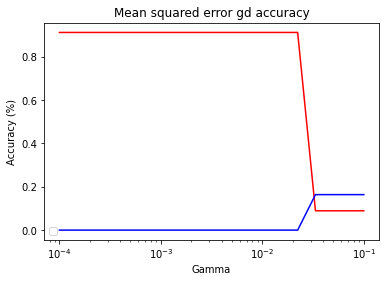

In [29]:
# tu peux plot tes tableaux ici ca fait ton parametre x accuracies et f1 
# (change le gammas si t'as changé de param la haut)
plt.plot(gammas,accs,"r")
plt.plot(gammas, f1s, "b")

plt.title("Mean squared error gd accuracy")
plt.legend(loc="lower left")
plt.xlabel("Gamma")
plt.ylabel("Accuracy (%)")
plt.xscale('log')
plt.show()